O caixeiro com gasolina infinita (e sem conciência ambiental)
========================================



## Introdução



Este problema consiste na tentativa do algoritmo de encontrar o maior caminho para se chegar a realizar uma viagem passando por algumas cidades sem passar duas vezes pelo mesmo lugar.

## Objetivo



Encontrar o caminho de *maior* distância no problema do caixeiro viajante e mostrar ele de forma gráfica.

**Considerações do experimento**:
Considere um número $n\geq 7$ de coordenadas $(x,y)$ de cidades e que o caixeiro tenha combustível infinito. Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade mais de uma vez.

## Importações



Todos os comandos de `import` devem estar dentro desta seção.



In [14]:
import random 
import matplotlib.pyplot as plt
from itertools import permutations
from funcoes import cria_cidades
from funcoes import selecao_torneio_max as funcao_selecao
from funcoes import populacao_inicial_cv as cria_populacao_inicial
from funcoes import funcao_objetivo_pop_cv
from funcoes import funcao_objetivo_cv
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao

## Códigos e discussão



In [4]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
NUM_GERACOES = 1000
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3

# relacionadas ao problema a ser resolvido

NUMERO_DE_CIDADES = 8
CIDADES = cria_cidades(NUMERO_DE_CIDADES)

In [5]:
#Funções locais

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def funcao_objetivo_individuo(individuo):
    return funcao_objetivo_cv(individuo, CIDADES)

In [6]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, CIDADES)

melhor_fitness_ja_visto = -float("inf")  # é assim que escrevemos infinito em python

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness 
        
#Código feito de forma semelhante ao códido do professor Daniel Cassar para o problema do caixeiro viajante no caso de minimização

In [7]:
# Busca testando todas as permutações

melhor_fitness_ever = -float("inf")

# testando todas as permutações possíveis
for caminho in permutations(list(CIDADES.keys())):
    distancia = funcao_objetivo_individuo(caminho)
    if distancia > melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho
        
#Código feito de forma semelhante ao códido do professor Daniel Cassar para o problema do caixeiro viajante no caso de minimização

In [8]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", melhor_fitness_ever)

#Código feito de forma semelhante ao códido do professor Daniel Cassar para o problema do caixeiro viajante no caso de minimização


Melhor individuo obtido por algoritmos genéticos:
['Cidade 4', 'Cidade 3', 'Cidade 0', 'Cidade 5', 'Cidade 6', 'Cidade 1', 'Cidade 2', 'Cidade 7'] com distância: 5.136059910018164

Melhor individuo obtido por busca exaustiva:
('Cidade 0', 'Cidade 2', 'Cidade 3', 'Cidade 7', 'Cidade 4', 'Cidade 1', 'Cidade 6', 'Cidade 5') com distância: 5.136059910018164


### Ilustrando o problema por meio de grafos

In [15]:
#Criando grafo ilustrativo do problema

grafo_do_caminho = [] 

for i in melhor_resposta_ever:
    grafo_do_caminho.append(CIDADES[str(i)])
print(grafo_do_caminho)

[(0.7637216160685278, 0.3833832266128321), (0.7344842835163099, 0.9771658243211198), (0.6986871763415585, 0.028212308894888016), (0.9135535878955825, 0.7534743350685877), (0.6149464263608588, 0.17890026037163198), (0.8315819560911263, 0.5806853367819935), (0.007652903129312105, 0.608708958577301), (0.7471099784793915, 0.5476748925533835)]


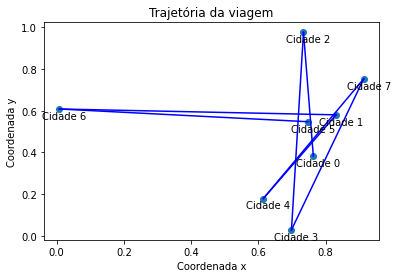

In [19]:
#Dando nome a cada um dos pontos que compõem a localização das cidades

x = [ponto[0] for ponto in grafo_do_caminho]
y = [ponto[1] for ponto in grafo_do_caminho]

for n, nome in enumerate(melhor_resposta_ever):
    plt.annotate(nome, (x[n], y[n]), textcoords = "offset points", xytext=(5, -10), ha='center')
    
#Plotando os pontos

plt.scatter(x,y)

#liga os pontos com segmentos de reta

for e in range(len(grafo_do_caminho)-1):
    plt.plot([grafo_do_caminho[e][0], grafo_do_caminho[e+1][0]], [grafo_do_caminho[e][1], grafo_do_caminho[e+1][1]], 'b-')
    
#Dando nome aos eixos

plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Trajetória da viagem')

plt.show()

## Conclusão



Este problema é bem semelhante com o do caixeiro viajante, sendo assim, seu algoritmo genético é bem parecido com o abordado no experimento de aula 6. A diferença presente naquele problema e neste é que agora queremos encontrar o maior trajeto possível para o viajante percorrer, dessa forma, trata-se de um problema de maximização. Com isso, na hora de programar o algoritmo precisamos mudar todos os sinais que buscam o menor maior possível para a variável, pelo sinal que busca o maior valor. Ademais, para esse problema foi necessário o uso da função de torneio máximo e não o mínimo. Por fim, para ilustrar o problema, foi feito um grafo ilustrativo do caminho que o viajante deveria percorrer.

## Playground



Todo código de teste que não faz parte do seu experimento deve vir aqui. Este código não será considerado na avaliação.

